# **Programa Principal**

In [1]:
#!pip install pandas -q
#!pip install matplotlib -q
#!pip install seaborn -q
#!pip install db-sqlite3 -q
#!pip install SQLAlchemy -q
#!pip install requests -q
#!pip install folium
#!pip install seaborn



## 1) Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import os

## 2) Extração de dados

In [3]:
df_janeiro = pd.read_csv('./dados/focos_mensal_br_202401.csv')
df_fevereiro = pd.read_csv('./dados/focos_mensal_br_202402.csv')
df_marco = pd.read_csv('./dados/focos_mensal_br_202403.csv')
df_abril = pd.read_csv('./dados/focos_mensal_br_202404.csv')
df_maio = pd.read_csv('./dados/focos_mensal_br_202405.csv')
df_junho = pd.read_csv('./dados/focos_mensal_br_202406.csv')

In [4]:
#setando o caminho + arquivos que serão concatenados
path = 'dados/focos_mensal_br_2024'

#concatenar os arquivos csv com o nome igual ao setado em "path"
df_brasil_2024 = pd.concat([pd.read_csv(f"{path}{mes:02}.csv") for mes in range(1,7)])

#exibir a tabela concatenada
df_brasil_2024

,id,lat,lon,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp
0,966ed445-fa70-3369-9802-3e74c5765684,-12.5667,-41.4364,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,8,1.38,0.70,Caatinga,76.5
1,0669c14d-7a39-3d98-9f20-23e118fbcf09,-12.5662,-41.4611,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,9,1.73,0.83,Caatinga,81.4
2,53a46800-fa40-3323-9b20-05108d435c24,-18.0629,-57.3721,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,14.42,0.00,Pantanal,59.8
3,d0af560b-c440-3554-a5c6-83fb055304e8,-18.0823,-57.3902,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,63.4
4,b509b339-729d-3a30-a7d9-8a6a33398a4f,-18.0823,-57.3902,2024-01-01 00:16:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,64.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353038,feb4f53b-e202-350c-8f74-7f82fc40cb1d,-19.6805,-57.0351,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,62,0.00,0.84,Pantanal,106.4
353039,7fcb2a72-dd94-33e5-b249-69de261a3faf,-19.6801,-57.0561,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.94,Pantanal,60.7
353040,7d66733d-24fd-3205-967d-17dc67e60fd2,-20.0190,-42.8786,2024-06-30 23:36:57,GOES-16,SÃO DOMINGOS DO PRATA,MINAS GERAIS,Brasil,3161007,31,33,88,0.00,1.00,Mata Atlântica,86.7
353041,defe4e3a-b07b-30a1-9a9c-9e3403ab2967,-19.6604,-57.0379,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.89,Pantanal,68.3


In [5]:
#mostrar quantidade de celulas x colunas
df_brasil_2024.shape

(983232, 16)

In [6]:
#descrever 
df_brasil_2024.describe()

,lat,lon,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,frp
count,983232.000000,983232.000000,9.832320e+05,983232.000000,983232.0,983232.000000,983232.000000,983232.000000,951407.000000
mean,-9.993129,-53.809391,3.189780e+06,31.827838,33.0,9.495614,0.690434,-21.650540,33.780956
std,8.596091,6.936608,1.611532e+06,16.108001,0.0,104.052397,3.708917,147.580664,57.590815
min,-33.715350,-73.666210,1.100015e+06,11.000000,33.0,-999.000000,0.000000,-999.000000,0.000000
25%,-17.497535,-60.026930,1.400472e+06,14.000000,33.0,5.000000,0.000000,0.210000,3.800000
50%,-11.185035,-56.279550,2.922250e+06,29.000000,33.0,14.000000,0.000000,0.770000,9.400000
75%,-2.304890,-48.093350,5.006903e+06,50.000000,33.0,29.000000,0.000000,1.000000,54.200000
max,5.163930,-34.809400,5.300108e+06,53.000000,33.0,93.000000,252.980000,1.000000,4720.700000


### 2.1. Queimadas 2023

`Tratamento dos nomes das Colunas`

In [7]:
#exibir nome das colunas
df_brasil_2024.columns

Index(['id', 'lat', 'lon', 'data_hora_gmt', 'satelite', 'municipio', 'estado',
       'pais', 'municipio_id', 'estado_id', 'pais_id', 'numero_dias_sem_chuva',
       'precipitacao', 'risco_fogo', 'bioma', 'frp'],
      dtype='object')

In [8]:
#renomear colunas
df_brasil_2024.rename(columns={'lat': 'latitude', 'lon': 'longitude'}, inplace=True)

`Tratamento de Null`

In [9]:
#verificando quais colunas possuem valores nulos
df_brasil_2024.isnull().sum()

id                           0
latitude                     0
longitude                    0
data_hora_gmt                0
satelite                     0
municipio                    0
estado                       0
pais                         0
municipio_id                 0
estado_id                    0
pais_id                      0
numero_dias_sem_chuva        0
precipitacao                 0
risco_fogo                   0
bioma                        1
frp                      31825
dtype: int64

In [10]:
df_brasil_2024.fillna('Desconhecido')

,id,latitude,longitude,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp
0,966ed445-fa70-3369-9802-3e74c5765684,-12.5667,-41.4364,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,8,1.38,0.70,Caatinga,76.5
1,0669c14d-7a39-3d98-9f20-23e118fbcf09,-12.5662,-41.4611,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,9,1.73,0.83,Caatinga,81.4
2,53a46800-fa40-3323-9b20-05108d435c24,-18.0629,-57.3721,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,14.42,0.00,Pantanal,59.8
3,d0af560b-c440-3554-a5c6-83fb055304e8,-18.0823,-57.3902,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,63.4
4,b509b339-729d-3a30-a7d9-8a6a33398a4f,-18.0823,-57.3902,2024-01-01 00:16:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,64.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353038,feb4f53b-e202-350c-8f74-7f82fc40cb1d,-19.6805,-57.0351,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,62,0.00,0.84,Pantanal,106.4
353039,7fcb2a72-dd94-33e5-b249-69de261a3faf,-19.6801,-57.0561,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.94,Pantanal,60.7
353040,7d66733d-24fd-3205-967d-17dc67e60fd2,-20.0190,-42.8786,2024-06-30 23:36:57,GOES-16,SÃO DOMINGOS DO PRATA,MINAS GERAIS,Brasil,3161007,31,33,88,0.00,1.00,Mata Atlântica,86.7
353041,defe4e3a-b07b-30a1-9a9c-9e3403ab2967,-19.6604,-57.0379,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.89,Pantanal,68.3


In [11]:
#remover espaços em branco dos nomes das colunas

df_brasil_2024.columns = df_brasil_2024.columns.str.strip()

#remover espaços em branco dos dados das células

df_brasil_2024 = df_brasil_2024.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df_brasil_2024

,id,latitude,longitude,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp
0,966ed445-fa70-3369-9802-3e74c5765684,-12.5667,-41.4364,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,8,1.38,0.70,Caatinga,76.5
1,0669c14d-7a39-3d98-9f20-23e118fbcf09,-12.5662,-41.4611,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,9,1.73,0.83,Caatinga,81.4
2,53a46800-fa40-3323-9b20-05108d435c24,-18.0629,-57.3721,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,14.42,0.00,Pantanal,59.8
3,d0af560b-c440-3554-a5c6-83fb055304e8,-18.0823,-57.3902,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,63.4
4,b509b339-729d-3a30-a7d9-8a6a33398a4f,-18.0823,-57.3902,2024-01-01 00:16:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,64.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353038,feb4f53b-e202-350c-8f74-7f82fc40cb1d,-19.6805,-57.0351,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,62,0.00,0.84,Pantanal,106.4
353039,7fcb2a72-dd94-33e5-b249-69de261a3faf,-19.6801,-57.0561,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.94,Pantanal,60.7
353040,7d66733d-24fd-3205-967d-17dc67e60fd2,-20.0190,-42.8786,2024-06-30 23:36:57,GOES-16,SÃO DOMINGOS DO PRATA,MINAS GERAIS,Brasil,3161007,31,33,88,0.00,1.00,Mata Atlântica,86.7
353041,defe4e3a-b07b-30a1-9a9c-9e3403ab2967,-19.6604,-57.0379,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.89,Pantanal,68.3


`Exclusão de colunas não utilizadas`

In [12]:
#removendo colunas
df_brasil_2024.drop('frp', axis=1, inplace=True)
df_brasil_2024.drop('id', axis=1, inplace=True)
df_brasil_2024.drop('pais', axis=1, inplace=True)
df_brasil_2024.drop('municipio_id', axis=1, inplace=True)
df_brasil_2024.drop('estado_id', axis=1, inplace=True)
df_brasil_2024.drop('pais_id', axis=1, inplace=True)

`Exclusão de Dados incoerentes`

"Nos downloads de focos do BDQ-Banco de Dados de Queimadas, o atributo "RiscoFogo" dos focos é o valor do Risco de Fogo previsto para o mesmo dia da ocorrência do foco, segundo o método de cálculo descrito em: Método do Cálculo do Risco de Fogo do Programa do INPE. Neste documento você vai notar que os valores são válidos de 0 a 1 e, o número -999 representa valor inválido, normalmente relacionado como área urbana ou corpos d'água, onde não faz sentido calcular o Riso de Fogo."
Disponível em: <https://terrabrasilis.dpi.inpe.br/queimadas/portal/faq/index.html> Pergunta 43

In [13]:
df_brasil_2024.query('risco_fogo != -999', inplace=True)
df_brasil_2024.query('numero_dias_sem_chuva > 0', inplace=True)


## 3) Gráficos

### 3.1. Mapa de calor (Heatmap) de Risco de Fogo

In [14]:
#Diogo
Risk_of_Fire=df_brasil_2024.sort_values(by='risco_fogo',ascending=False)
new_set = Risk_of_Fire.head(25)

In [15]:
#Trasforma valores do dataframe para lista
coordenadas_fogo = new_set[['latitude', 'longitude']].values.tolist()
municipios = new_set[['municipio']].values.tolist()
print(coordenadas_fogo[0:4])
print(municipios[0:4])

[[-14.61803, -52.02967], [2.55771, -61.80384], [2.55407, -61.8033], [2.5545, -61.82509]]
[['NOVA NAZARÉ'], ['MUCAJAÍ'], ['MUCAJAÍ'], ['MUCAJAÍ']]


In [16]:
#Definição de ponto central folium
F_Mapa = folium.Map([-15.797515,-47.891887],zoom_start=5,control_scale=True)

#Plotagem de marcadores no mapa
for i in range(len(coordenadas_fogo)):
    pontos = coordenadas_fogo[i]
    cid = municipios[i]
    folium.Marker(pontos, popup=cid).add_to(F_Mapa)
F_Mapa



### 3.2. Mapa de precipitação

In [17]:
#Diogo
precipitation_set=df_brasil_2024.sort_values(by='precipitacao',ascending=False)
p_new_set = precipitation_set.head(25)

In [18]:
#Trasforma valores do dataframe para lista
coordenadas_agua = p_new_set[['latitude', 'longitude']].values.tolist()
municipios = p_new_set[['municipio']].values.tolist()
chuva = p_new_set[['precipitacao']].values.tolist()
print(coordenadas_agua[0:4])
print(municipios[0:4])
print(chuva[0:4])

[[0.3826, -60.5695], [0.3806, -60.578098], [0.3736, -60.5633], [0.3736, -60.5822]]
[['RORAINÓPOLIS'], ['RORAINÓPOLIS'], ['RORAINÓPOLIS'], ['RORAINÓPOLIS']]
[[157.24], [156.32], [155.74], [154.68]]


In [19]:
#Definição de ponto central
P_Mapa = folium.Map([-15.797515,-47.891887],zoom_start=5,control_scale=True)

#Plotagem de marcadores no mapa
for i in range(len(coordenadas_agua)):
    pontos = coordenadas_agua[i]
    cid = municipios[i]
    agua = chuva[i]
    folium.Marker(pontos, popup=(cid,agua)).add_to(P_Mapa)
P_Mapa

### 3.3. Gráfico de Linha para Número de Dias sem Chuva

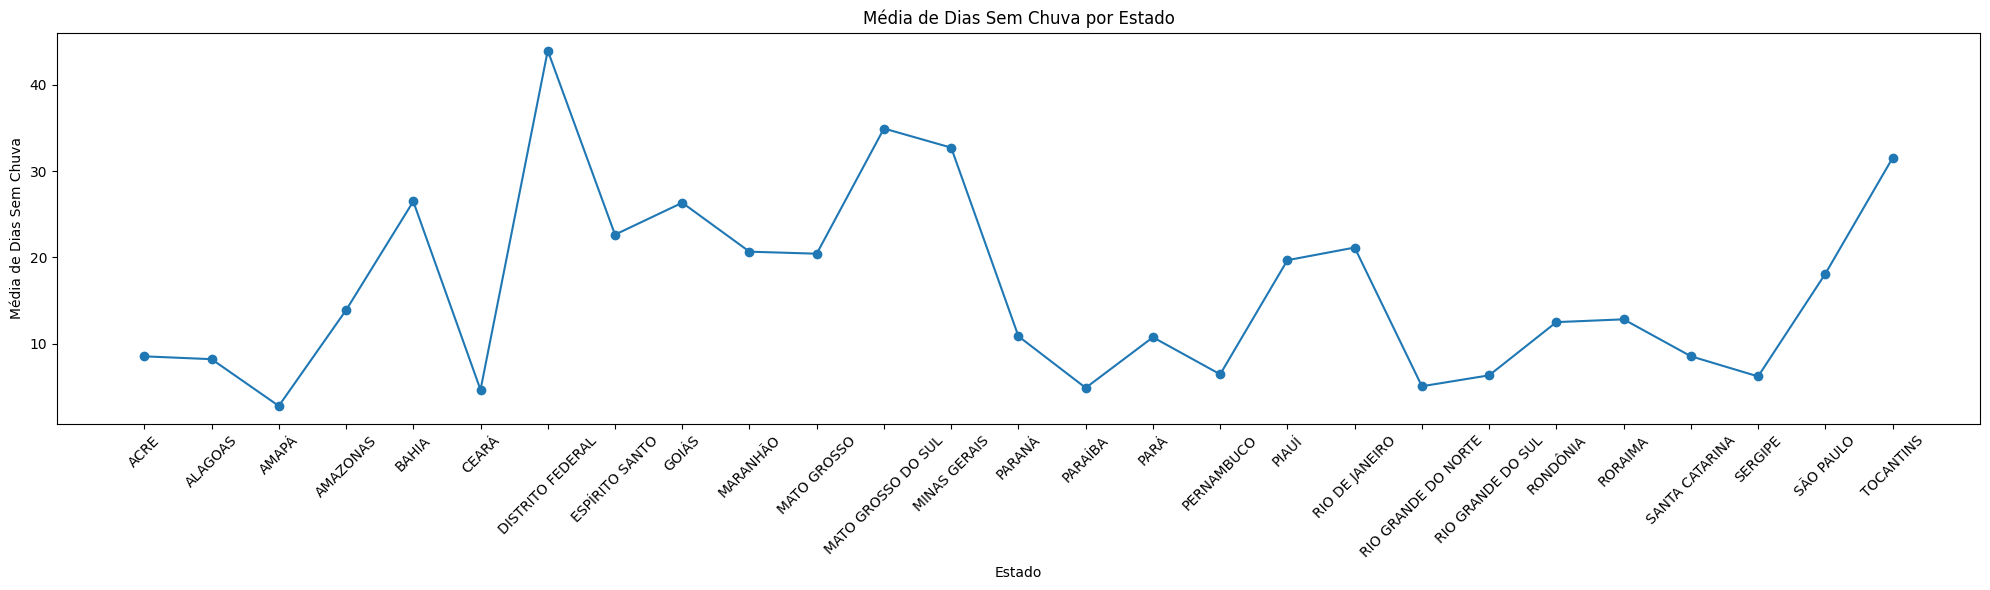

In [20]:
#filtrar apenas os dias com resultados positivos
df_filtrado = df_brasil_2024[df_brasil_2024['numero_dias_sem_chuva'] >= 0]

#agrupar por estado e tirar a média dos dias
df_agrupado = df_filtrado.groupby('estado')['numero_dias_sem_chuva'].mean().reset_index()

#plotar o gráfico
plt.figure(figsize=(20, 6))
plt.plot(df_agrupado['estado'], df_agrupado['numero_dias_sem_chuva'], marker='o')

#adicionar um titulo e os rótulos, além de nomear
plt.title('Média de Dias Sem Chuva por Estado')
plt.xlabel('Estado')
plt.ylabel('Média de Dias Sem Chuva')

#deixar os rótulos na diagonal
plt.xticks(rotation=45)

#ajustar o layout
plt.tight_layout()
plt.show()


### 3.4. Gráfico de Dispersão (Scatter Plot)

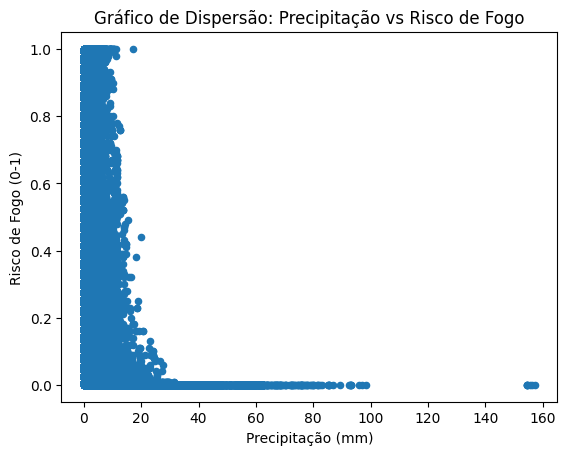

In [21]:
df_brasil_2024.plot(
    kind='scatter', 
    x='precipitacao', 
    y='risco_fogo',
    ylabel='Risco de Fogo (0-1)', 
    xlabel='Precipitação (mm)', 
    title='Gráfico de Dispersão: Precipitação vs Risco de Fogo');

**Explicação**: 
- A precipitação é um fator que influencia significativamente a redução do risco de fogo;
- Quanto maior o nível de precipitação, menor é o risco de fogo e vice-versa;
- Portanto, há uma correlação inversa entre o Risco de fogo e a precipitação

### 3.5. Análise Temporal

In [22]:
df_brasil_2024.to_csv('dados/focos_mensal_br_2024.csv', index=False)

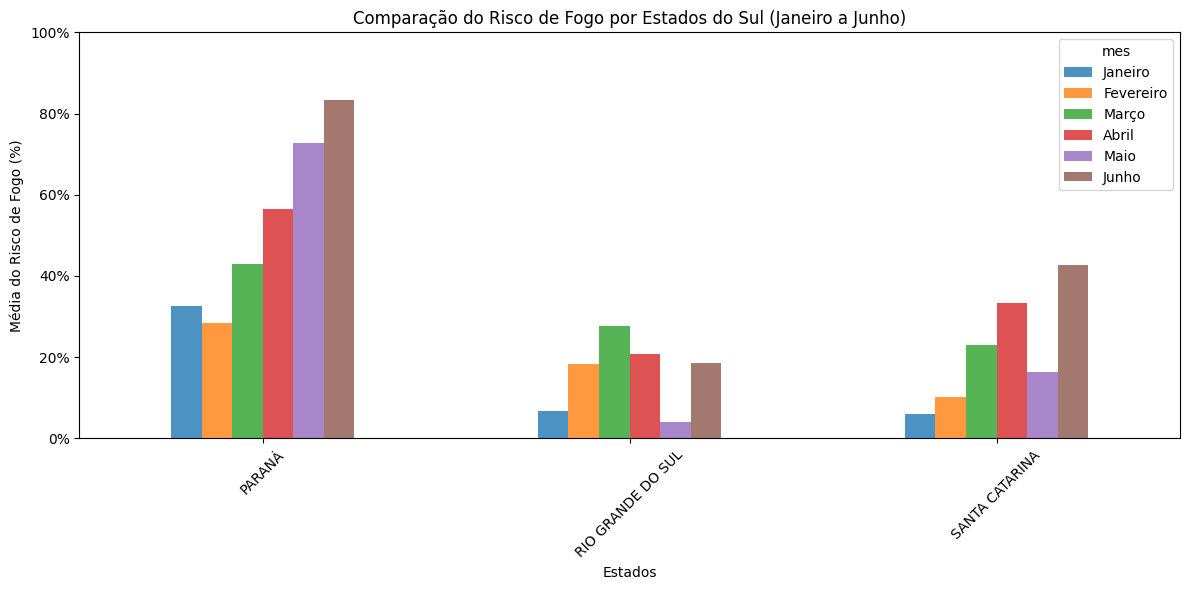

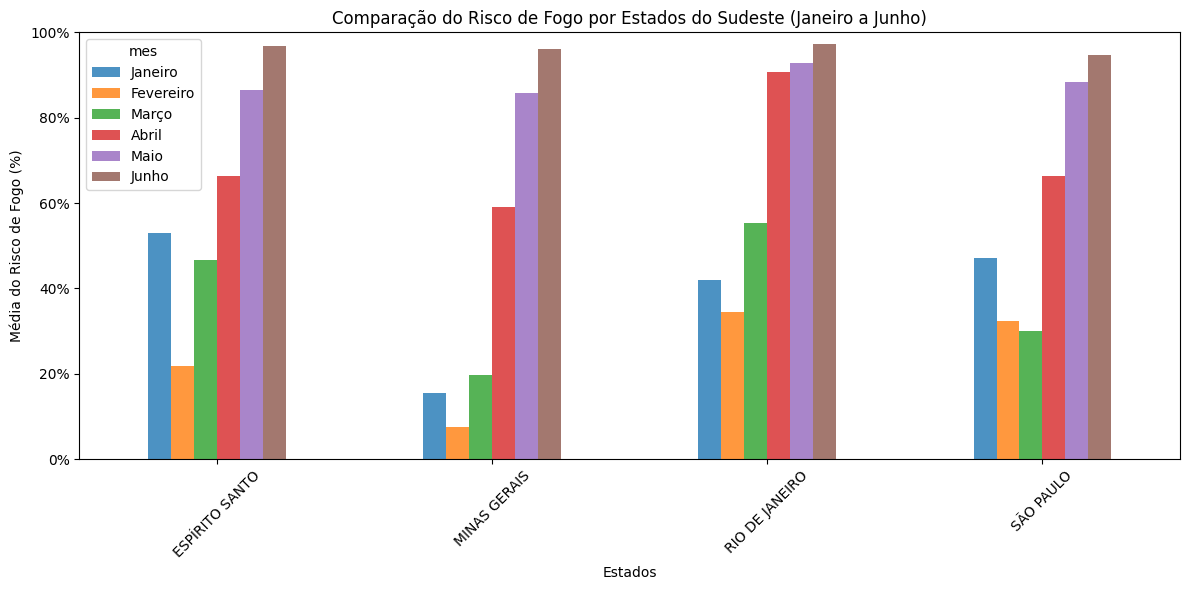

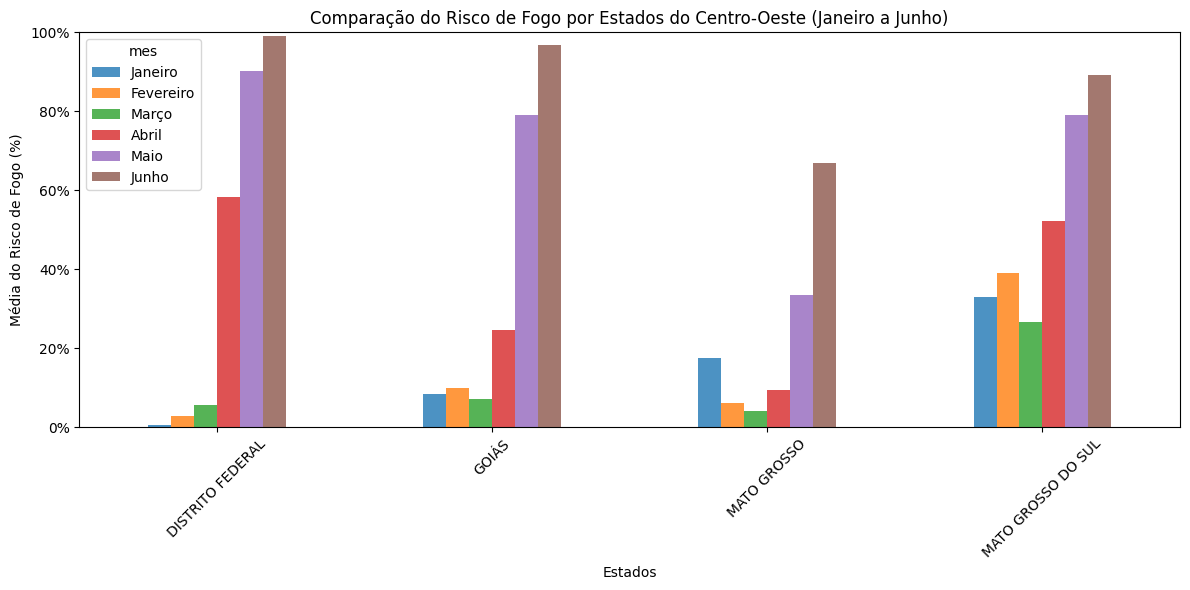

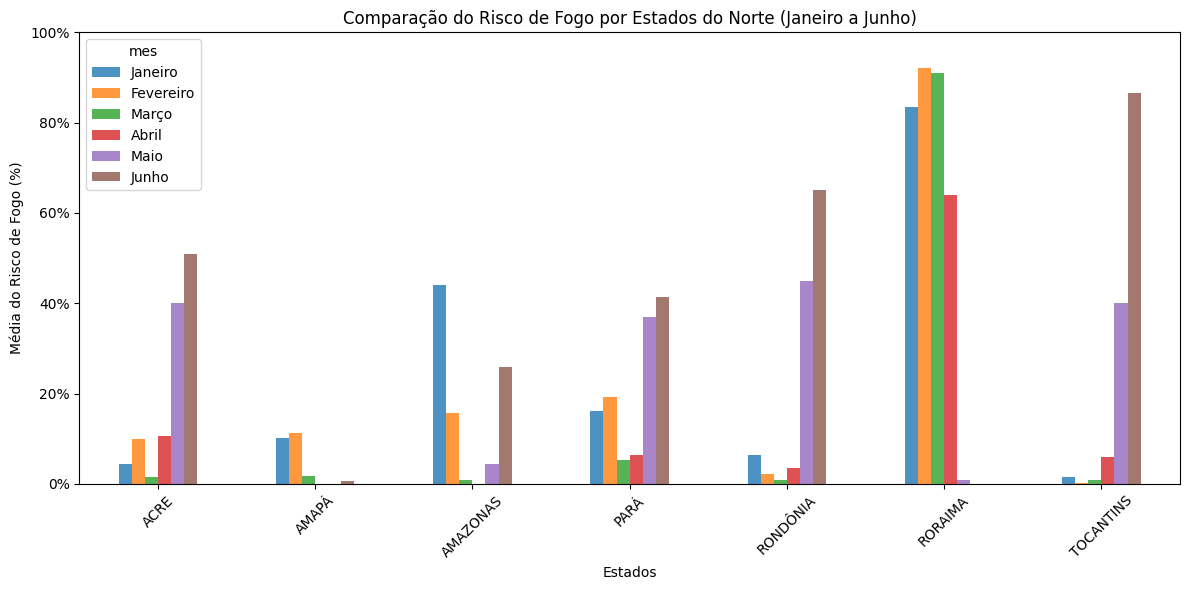

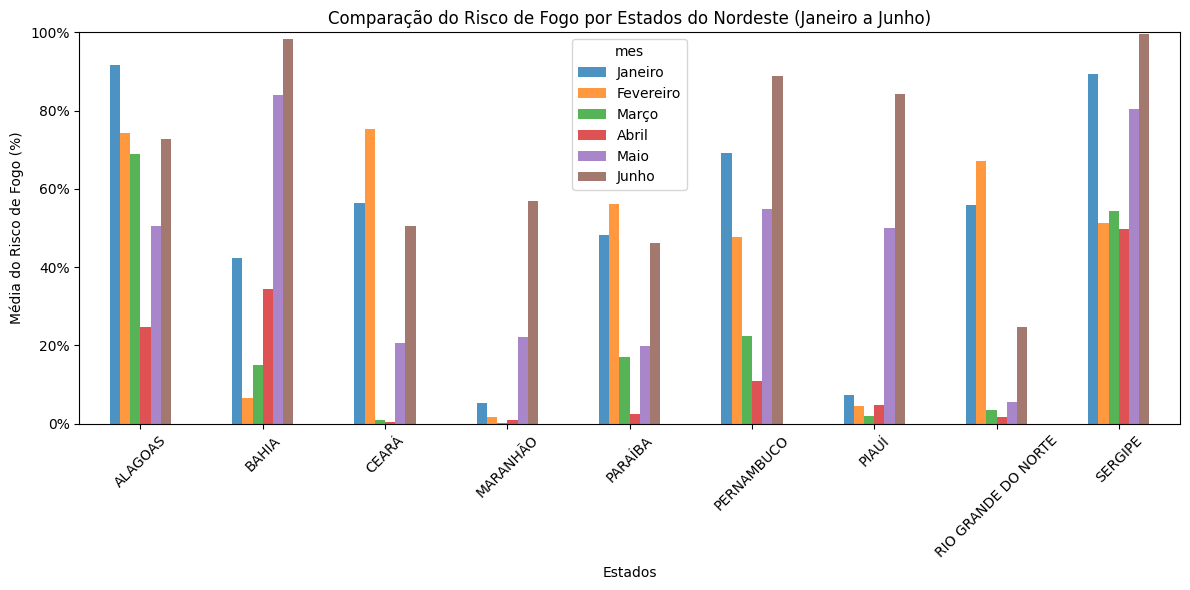

In [23]:
# Thiago
def Historograma_Risco_de_incendio (regiao, regiao_grafico):

    # Setando o caminho do arquivo
    path = 'dados/focos_mensal_br_2024'
    
    # Inicializando uma lista para armazenar os DataFrames
    df_list = []
    
    # Loop para ler e combinar os dados de janeiro a junho
    for mes_num in range(1, 7):
        arquivo = f"{path}{mes_num:02}.csv"
        
        mes_dict = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho'}
        mes = mes_dict[mes_num]
        
        # Verificando se o arquivo existe
        if os.path.exists(arquivo):
            # Lendo o arquivo CSV para o mês selecionado
            df_mes = pd.read_csv(arquivo)
            
            # Remover valores -999 da coluna 'risco_fogo'
            df_mes = df_mes[df_mes['risco_fogo'] != -999]
            
            # Adicionar uma coluna de mês
            df_mes['mes'] = mes
            
            # Adicionando o DataFrame à lista
            df_list.append(df_mes)
        else:
            print(f"O arquivo {arquivo} não foi encontrado.")
    
    # Concatenar todos os DataFrames em um único DataFrame
    df_brasil_2024 = pd.concat(df_list, ignore_index=True)
    
    # Filtrar os estados da região especificada
    municipios = df_brasil_2024[df_brasil_2024['estado'].isin(regiao)][['risco_fogo', 'estado', 'mes']]
    
    # Calcular a média do risco de fogo por estado e mês
    media_risco_estado_mes = municipios.groupby(['estado', 'mes'])['risco_fogo'].mean().reset_index()
    
    # Converter os valores de risco de fogo para porcentagem
    media_risco_estado_mes['risco_fogo'] = media_risco_estado_mes['risco_fogo'].abs() * 100
    
    # Definir a ordem correta dos meses
    meses_ordem = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']
    media_risco_estado_mes['mes'] = pd.Categorical(media_risco_estado_mes['mes'], categories=meses_ordem, ordered=True)
    
    # Pivotar a tabela para facilitar a plotagem
    pivot_table = media_risco_estado_mes.pivot(index='estado', columns='mes', values='risco_fogo')
    
    # Criar o gráfico de barras
    plt.figure(figsize=(12, 6))  # Tamanho da figura
    
    # Criar o histograma
    pivot_table.plot(kind='bar', ax=plt.gca(), alpha=0.8)
    
    # Adicionar título e rótulos aos eixos
    plt.title(f'Comparação do Risco de Fogo por {regiao_grafico} (Janeiro a Junho)')
    plt.xlabel('Estados')
    plt.ylabel('Média do Risco de Fogo (%)')
    
    # Rotacionar os rótulos do eixo x
    plt.xticks(rotation=45)
    
    # Configurar o eixo y para mostrar porcentagens
    plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())
    
    # Ajustar o limite do eixo y para uma melhor visualização
    plt.ylim(0, 100)  # limitar a 100%
    
    # Ajustar layout para evitar sobreposição
    plt.tight_layout()
    
    # Mostrar o gráfico
    plt.show()

estados_sul = ['PARANÁ', 'SANTA CATARINA', 'RIO GRANDE DO SUL']
estados_sudeste = ['MINAS GERAIS', 'SÃO PAULO', 'RIO DE JANEIRO', 'ESPÍRITO SANTO']
estados_centro = ['GOIÁS', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'DISTRITO FEDERAL']
estados_norte = ['ACRE', 'AMAPÁ', 'AMAZONAS', 'PARÁ', 'RONDÔNIA', 'RORAIMA', 'TOCANTINS']
estados_nordeste = ['ALAGOAS', 'BAHIA', 'CEARÁ', 'MARANHÃO', 'PARAÍBA', 'PERNAMBUCO', 'PIAUÍ', 'RIO GRANDE DO NORTE', 'SERGIPE']

Historograma_Risco_de_incendio(estados_sul, 'Estados do Sul')
Historograma_Risco_de_incendio(estados_sudeste, 'Estados do Sudeste')
Historograma_Risco_de_incendio(estados_centro, 'Estados do Centro-Oeste')
Historograma_Risco_de_incendio(estados_norte,'Estados do Norte')
Historograma_Risco_de_incendio(estados_nordeste, 'Estados do Nordeste')

### 3.6. Gráfico de Barras por Série Temporal Precipitação por Regiao:

In [24]:
# Alessandra

# DataFrame que separa os estados em regiões
def mapear_regioes(df):
    # Dicionário para mapeamento de estados por região
    regioes = {
        'Norte': ['ACRE', 'AMAPÁ', 'AMAZONAS', 'PARÁ', 'RONDÔNIA', 'RORAIMA', 'TOCANTINS'],
        'Nordeste': ['ALAGOAS', 'BAHIA', 'CEARÁ', 'MARANHÃO', 'PARAÍBA', 'PERNAMBUCO', 'PIAUÍ', 'RIO GRANDE DO NORTE', 'SERGIPE'],
        'Centro-Oeste': ['GOIÁS', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'DISTRITO FEDERAL'],
        'Sudeste': ['ESPÍRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SÃO PAULO'],
        'Sul': ['PARANÁ', 'RIO GRANDE DO SUL', 'SANTA CATARINA']
    }

    # Criar uma nova coluna 'regiao' baseada no estado
    df['regiao'] = df['estado'].map(lambda estado: next((regiao for regiao, estados in regioes.items() if estado in estados), 'Desconhecida'))
    
    # Imprimir as regiões e seus estados mapeados
    for regiao, estados in regioes.items():
        print(f'Região: {regiao}')
        print(f'Estados: {", ".join(estados)}\n')
    
    return df

# Aplicar ao DataFrame principal
df_brasil_2024 = mapear_regioes(df_brasil_2024)

# Imprimir as regiões únicas
print(df_brasil_2024['regiao'].unique())

Região: Norte
Estados: ACRE, AMAPÁ, AMAZONAS, PARÁ, RONDÔNIA, RORAIMA, TOCANTINS

Região: Nordeste
Estados: ALAGOAS, BAHIA, CEARÁ, MARANHÃO, PARAÍBA, PERNAMBUCO, PIAUÍ, RIO GRANDE DO NORTE, SERGIPE

Região: Centro-Oeste
Estados: GOIÁS, MATO GROSSO, MATO GROSSO DO SUL, DISTRITO FEDERAL

Região: Sudeste
Estados: ESPÍRITO SANTO, MINAS GERAIS, RIO DE JANEIRO, SÃO PAULO

Região: Sul
Estados: PARANÁ, RIO GRANDE DO SUL, SANTA CATARINA

['Nordeste' 'Norte' 'Sudeste' 'Centro-Oeste' 'Sul']


[1 2 3 4 5 6]
mes                  1         2         3         4        5        6
regiao                                                                
Centro-Oeste  48118.70  66087.41  32883.98  13216.29  5852.85  1390.41
Nordeste      42708.38  22121.79  21606.89   7030.09  2398.27  1328.97
Norte         17577.05  17082.19  36995.71  16841.38  4211.90  4746.47
Sudeste        7259.14   9598.45   7745.27   1152.11  1149.01   242.91
Sul            3631.44   5370.16   1883.44   1928.71   685.78   364.84


<Figure size 1500x800 with 0 Axes>

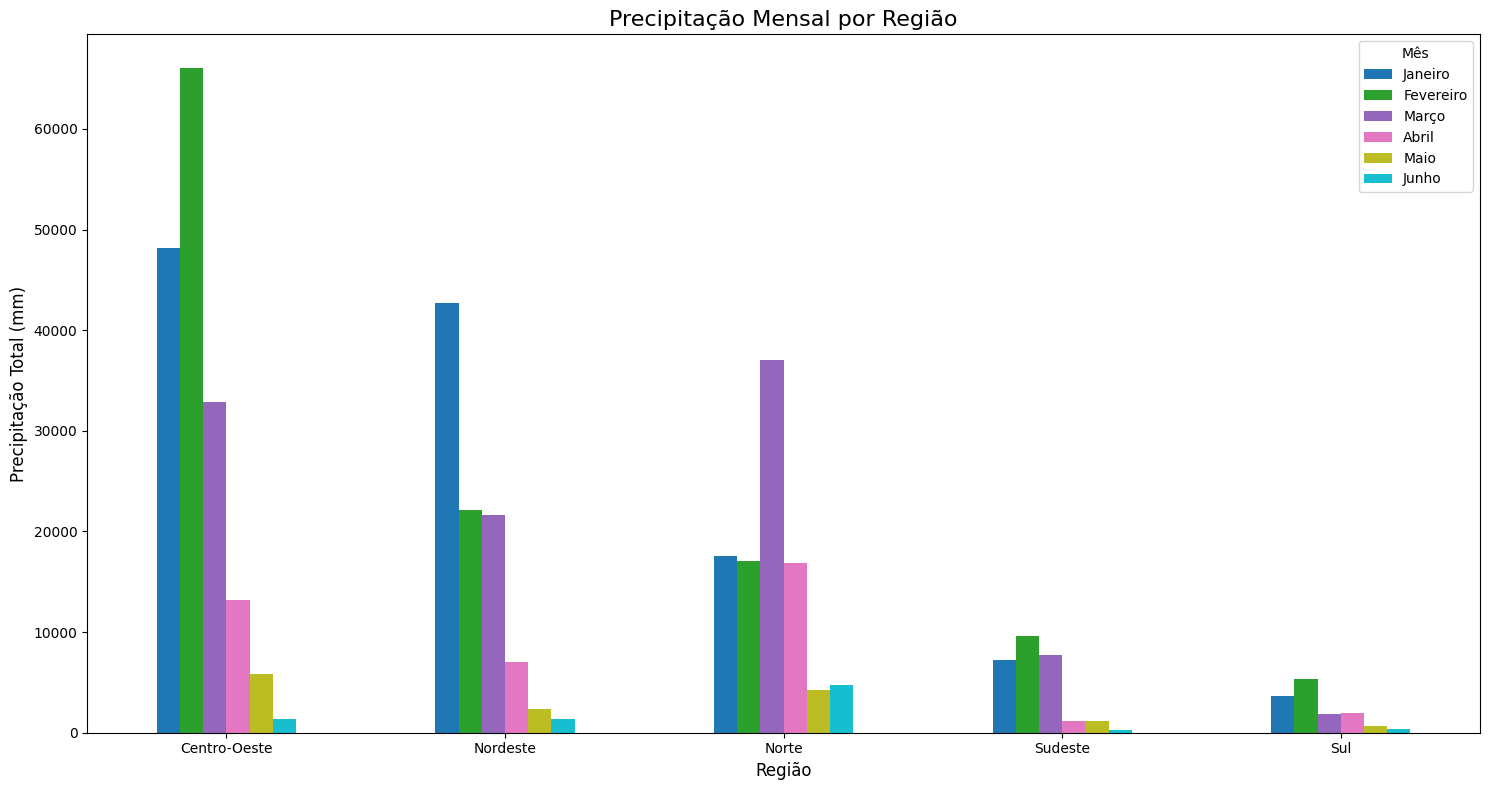

In [25]:
import matplotlib.pyplot as plt

# Converter 'data_hora_gmt' para datetime e criar coluna 'mes'
df_brasil_2024['data_hora_gmt'] = pd.to_datetime(df_brasil_2024['data_hora_gmt'])
df_brasil_2024['mes'] = df_brasil_2024['data_hora_gmt'].dt.month

# Verifique os meses únicos
print(df_brasil_2024['mes'].unique())

# Agrupar os dados por 'região' e 'mês' e somar a precipitação
df_agrupado = df_brasil_2024.groupby(['regiao', 'mes'])['precipitacao'].sum().unstack(fill_value=0)

# Verificar o DataFrame agrupado
print(df_agrupado)

# Criar o gráfico de barras para a série temporal (por mês e por região)
plt.figure(figsize=(15, 8))
df_agrupado.plot(kind='bar', stacked=False, figsize=(15, 8), cmap='tab10')

plt.title('Precipitação Mensal por Região', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Precipitação Total (mm)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Mês', labels=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho'])

plt.tight_layout()
plt.show()

### 3.6.1 Número de queimadas por região Versus Precipitação (Impacto):

Mostra claramente quais regiões sofreram com maiores volumes de precipitação e mais ocorrências de queimadas no período de janeiro a junho. A soma destaca o efeito cumulativo desses fenômenos, o que é crucial para entender o impacto geral na região.

Extrair precipitação: Ordenar o DataFrame por precipitação e selecionar os principais valores

In [26]:

precipitation_set = df_brasil_2024.sort_values(by='precipitacao', ascending=False)
precipitacao = df_brasil_2024.groupby('regiao')['precipitacao'].sum()

Extrair queimadas: Número de queimadas (risco_fogo):

In [27]:

queimadas = df_brasil_2024.sort_values(by='risco_fogo', ascending=False)
queimadas = df_brasil_2024.groupby('regiao')['risco_fogo'].sum()

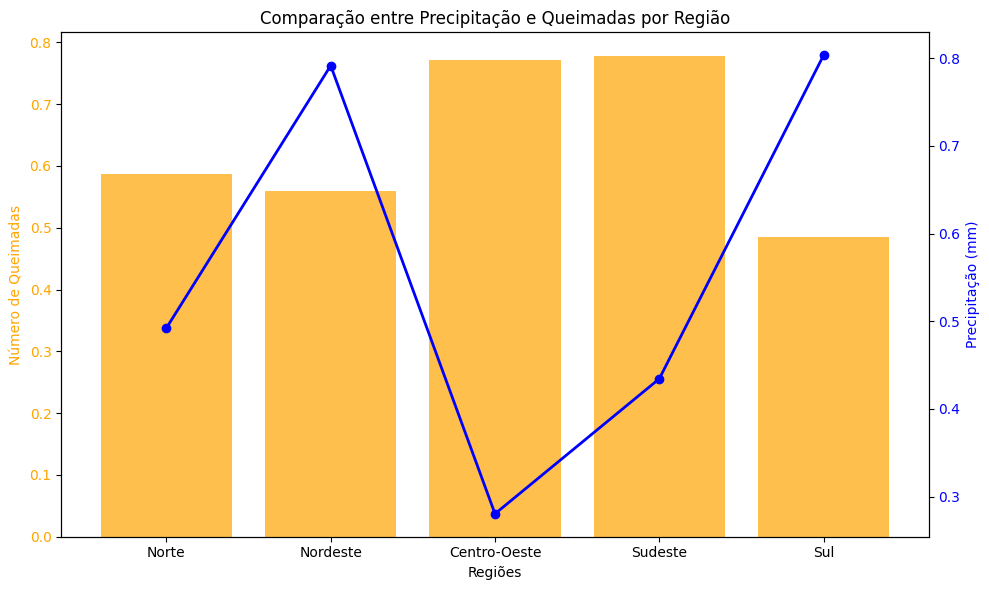

In [28]:
import matplotlib.pyplot as plt
import numpy as np

regioes = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']

# Obtém a média de precipitação e risco de fogo por região
precipitacao = df_brasil_2024.groupby('regiao')['precipitacao'].mean()
queimadas = df_brasil_2024.groupby('regiao')['risco_fogo'].mean()

# Gráfico combinado
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras - Queimadas
ax1.bar(regioes, queimadas, color='orange', alpha=0.7, label='Queimadas')
ax1.set_xlabel('Regiões')
ax1.set_ylabel('Número de Queimadas', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Eixo secundário para a linha de precipitação
ax2 = ax1.twinx()
ax2.plot(regioes, precipitacao, color='blue', marker='o', linewidth=2, label='Precipitação')
ax2.set_ylabel('Precipitação (mm)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Comparação entre Precipitação e Queimadas por Região')
fig.tight_layout()

plt.show()

### 3.7. Gráfico de Barras Comparativo

DataFrame de Comparação:      estado  numero_dias_sem_chuva  precipitacao  risco_fogo
0      ACRE                  17538       1507.05    0.443247
1   ALAGOAS                  33586       8283.18    0.790022
2     AMAPÁ                    208        166.47    0.135811
3  AMAZONAS                 163449       6216.76    0.285750
4     BAHIA                1140587      24890.47    0.658187




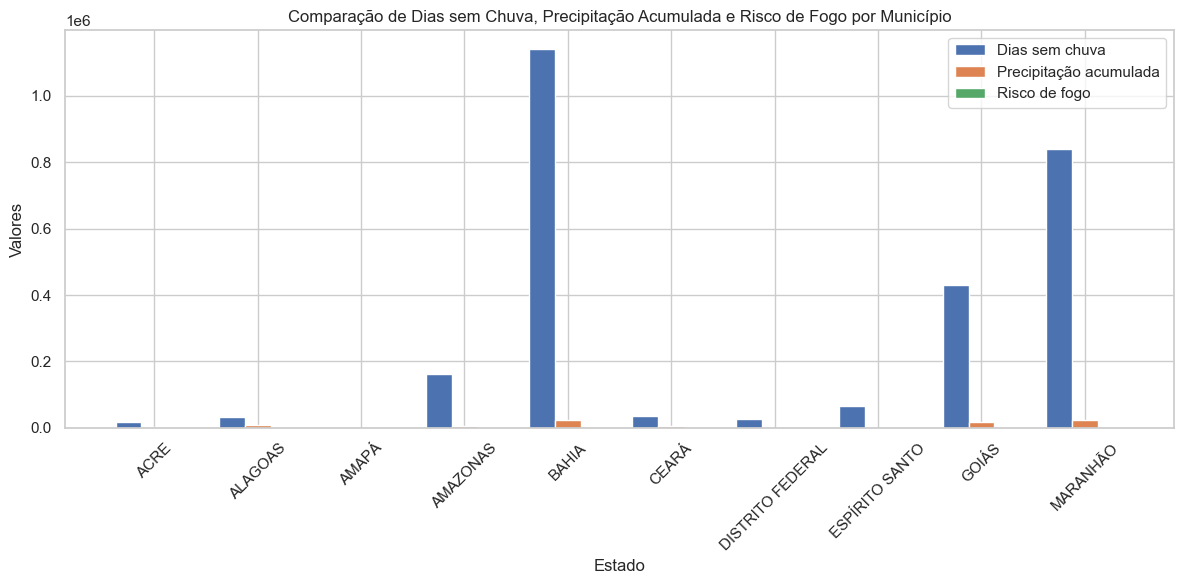

In [29]:
#Diana

# Configurar o estilo do Seaborn
sns.set(style='whitegrid')

# Agrupar os dados por estado
df_comparativo = df_brasil_2024.groupby('estado').agg({
    'numero_dias_sem_chuva': 'sum',  # Somar os dias sem chuva
    'precipitacao': 'sum',           # Somar a precipitação acumulada
    'risco_fogo': 'mean'             # Calcular a média do risco de fogo
}).reset_index()

# Verificar o DataFrame resultante
print("DataFrame de Comparação:", df_comparativo.head())
print("\n")

# Definir o número de estados a serem exibidos
n_estados = min(10, len(df_comparativo))

# Criar uma nova figura
plt.figure(figsize=(12, 6))

# Criar gráfico de barras
bar_width = 0.25
index = np.arange(n_estados)

# Barras para dias sem chuva
plt.bar(index, df_comparativo['numero_dias_sem_chuva'].head(n_estados), bar_width, label='Dias sem chuva')

# Barras para precipitação acumulada
plt.bar(index + bar_width, df_comparativo['precipitacao'].head(n_estados), bar_width, label='Precipitação acumulada')

# Barras para risco de fogo
plt.bar(index + 2 * bar_width, df_comparativo['risco_fogo'].head(n_estados), bar_width, label='Risco de fogo')

# Adicionar título e rótulos
plt.title('Comparação de Dias sem Chuva, Precipitação Acumulada e Risco de Fogo por Município')
plt.xlabel('Estado')
plt.ylabel('Valores')
plt.xticks(index + bar_width, df_comparativo['estado'].head(n_estados), rotation=45)
plt.legend()

# Exibir gráfico
plt.tight_layout()
plt.show()

### 3.8. Gráficos de Satélites

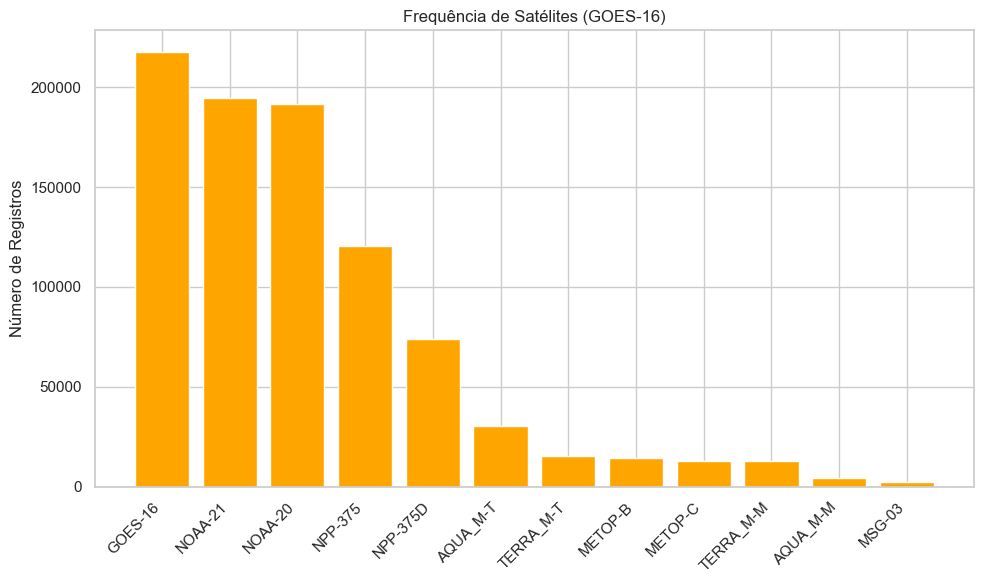

In [30]:
#Alessandra

import matplotlib.pyplot as plt

# Contar a frequência do satélite
satelite_counts = df_brasil_2024['satelite'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(satelite_counts.index, satelite_counts.values, color='orange')
plt.title('Frequência de Satélites (GOES-16)')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()